In [ ]:
%%capture
!pip install openmined_psi

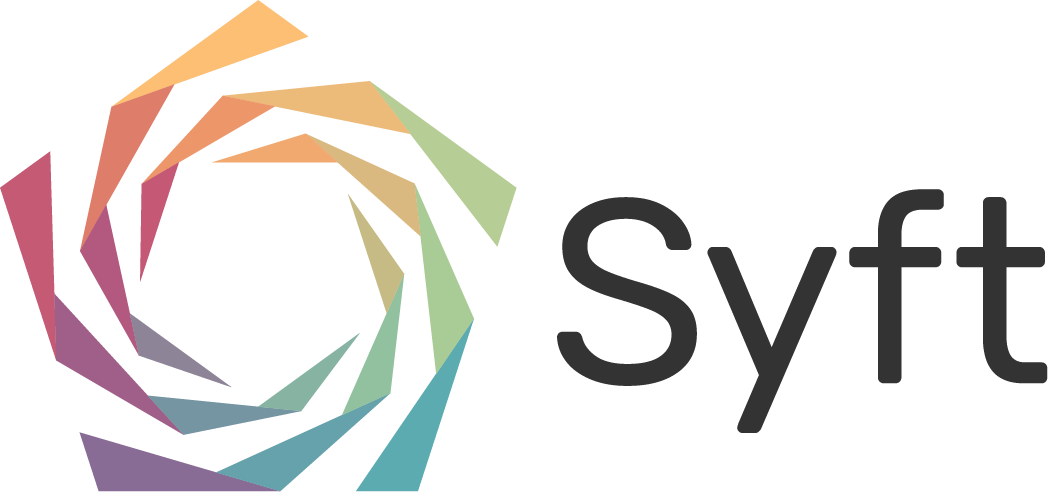

🎤  🎸  ♪♪♪ Joining Duet ♫♫♫  🎻  🎹

♫♫♫ > DISCLAIMER: Duet is an experimental feature currently in beta.
♫♫♫ >             Use at your own risk.
♫♫♫ >
♫♫♫ > Punching through firewall to OpenGrid Network Node at:
♫♫♫ > http://localhost:5000
♫♫♫ >
♫♫♫ > ...waiting for response from OpenGrid Network... DONE!
♫♫♫ > ...using a running event loop...

♫♫♫ > CONNECTED!


In [1]:
import syft as sy
duet = sy.join_duet(loopback=True)

In [2]:
import openmined_psi as psi

In [3]:
sy.load("openmined_psi")

from: https://github.com/OpenMined/PSI/blob/master/private_set_intersection/python/tests.py

# Goto --------> [server-step-1]

# [Client-Step-1]

## get reveal_intersection

In [4]:
duet.store.pandas

ID                   Tags  \
0  <UID: 6e4834534111430a927f3d5859fec6db>  [reveal_intersection]   
1  <UID: d007553a37ee4ff190c455d9a0ed1474>                  [fpr]   

                 Description  
0  reveal intersection value  
1        false positive rate

In [5]:
reveal_intersection_ptr = duet.store["reveal_intersection"]

In [6]:
reveal_intersection = reveal_intersection_ptr.get(
    request_block=True,
    name="reveal_intersection",
    reason="Are we revealing or not?",
    timeout_secs=10,
    delete_obj=False
)
reveal_intersection

False

## send client_items_len

In [7]:
client = psi.client.CreateWithNewKey(reveal_intersection)

In [8]:
client_items = ["Element " + str(i) for i in range(1000)]
sy_client_items_len = sy.lib.python.Int(len(client_items))
sy_client_items_len_ptr = sy_client_items_len.send(duet, pointable=True, tags=["client_items_len"], description="client items length")

In [9]:
duet.store.pandas

ID                   Tags  \
0  <UID: 6e4834534111430a927f3d5859fec6db>  [reveal_intersection]   
1  <UID: d007553a37ee4ff190c455d9a0ed1474>                  [fpr]   
2  <UID: 2111b6d7a68b4bd48bdb81c7cfb21b5b>     [client_items_len]   

                 Description  
0  reveal intersection value  
1        false positive rate  
2        client items length

# Goto --------> [Server-Step-2]

# [Client-Step-2]

## get setup message

In [10]:
duet.store.pandas

ID                   Tags  \
0  <UID: 6e4834534111430a927f3d5859fec6db>  [reveal_intersection]   
1  <UID: d007553a37ee4ff190c455d9a0ed1474>                  [fpr]   
2  <UID: 2111b6d7a68b4bd48bdb81c7cfb21b5b>     [client_items_len]   
3  <UID: fd5746a341e848259f14a09d94e23bb3>                [setup]   

                 Description  
0  reveal intersection value  
1        false positive rate  
2        client items length  
3   psi.server Setup Message

In [11]:
setup_ptr = duet.store["setup"]

In [12]:
setup = setup_ptr.get(
    request_block=True,
    name="setup",
    reason="To get the setup",
    timeout_secs=10,
    delete_obj=False
)
type(setup)

private_set_intersection.proto.psi_pb2.ServerSetup

## send request

In [13]:
request = client.CreateRequest(client_items)

In [14]:
request_ptr = request.send(duet, tags=["request"], pointable=True, description="client request")

In [15]:
duet.store.pandas

ID                   Tags  \
0  <UID: 6e4834534111430a927f3d5859fec6db>  [reveal_intersection]   
1  <UID: d007553a37ee4ff190c455d9a0ed1474>                  [fpr]   
2  <UID: 2111b6d7a68b4bd48bdb81c7cfb21b5b>     [client_items_len]   
3  <UID: fd5746a341e848259f14a09d94e23bb3>                [setup]   
4  <UID: 43341c19a2c4492d93c866eb50068274>              [request]   

                 Description  
0  reveal intersection value  
1        false positive rate  
2        client items length  
3   psi.server Setup Message  
4             client request

# Goto --------> [Server-Step-3]

# [Client-Step-3]

## get response

In [16]:
duet.store.pandas

ID                   Tags  \
0  <UID: 6e4834534111430a927f3d5859fec6db>  [reveal_intersection]   
1  <UID: d007553a37ee4ff190c455d9a0ed1474>                  [fpr]   
2  <UID: 2111b6d7a68b4bd48bdb81c7cfb21b5b>     [client_items_len]   
3  <UID: fd5746a341e848259f14a09d94e23bb3>                [setup]   
4  <UID: 43341c19a2c4492d93c866eb50068274>              [request]   
5  <UID: d9c6b65240d74ec6ad3a2a55f41c70f8>             [response]   

                 Description  
0  reveal intersection value  
1        false positive rate  
2        client items length  
3   psi.server Setup Message  
4             client request  
5        psi.server response

In [17]:
response_ptr = duet.store["response"]

In [18]:
response = response_ptr.get(
    request_block=True,
    name="response",
    reason="To get the response",
    timeout_secs=10,
)
type(response)

private_set_intersection.proto.psi_pb2.Response

## get result

In [19]:
if reveal_intersection:
    intersection = client.GetIntersection(setup, response)
    iset = set(intersection)
    for idx in range(len(client_items)):
        if idx % 2 == 0:
            assert idx in iset
        else:
            assert idx not in iset

In [20]:
if not reveal_intersection:
    intersection = client.GetIntersectionSize(setup, response)
    assert intersection >= (len(client_items) / 2.0)
    assert intersection <= (1.1 * len(client_items) / 2.0)
intersection

500